## Fase 1: Exploración y Limpieza

### 1- Exploración Inicial:
 X Realiza una exploración inicial de los datos para identificar posibles problemas, como valores nulos, atípicos o datos faltantes en las columnas relevantes.
 X Utiliza funciones de Pandas para obtener información sobre la estructura de los datos, la presencia de valores nulos y estadísticas básicas de las columnas involucradas.
 X Uno los dos conjuntos de datos de la forma más eficiente. 

### 2- Limpieza de Datos:
 X Elimina o trata los valores nulos, si los hay, en las columnas clave para asegurar que los datos estén completos.
 X Verifica la consistencia y corrección de los datos para asegurarte de que los datos se presenten de forma coherente.
 X Realiza cualquier ajuste o conversión necesaria en las columnas (por ejemplo, cambiar tipos de datos) para garantizar la adecuación de los datos para el análisis estadístico.


In [60]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

pd.set_option('display.max_columns', None)

import warnings
warnings.filterwarnings("ignore")

In [61]:
df1 = pd.read_csv('Customer Flight Activity.csv', index_col=0)
pd.set_option('display.max_columns', None)
df1.reset_index(inplace =True, drop = False)

df2 = pd.read_csv('Customer Loyalty History.csv', index_col=0)
pd.set_option('display.max_columns', None)
df2.reset_index(inplace =True, drop = False)

df = pd.merge(df2, df1, on='Loyalty Number', how='inner')
df

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month,Year,Month,Flights Booked,Flights with Companions,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
0,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN,2017,1,0,0,0,0,0.0,0,0
1,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN,2017,2,3,0,3,2823,282.0,0,0
2,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN,2017,3,0,0,0,0,0.0,0,0
3,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN,2017,4,0,0,0,0,0.0,0,0
4,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN,2018,10,6,2,8,3352,335.0,465,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
405619,652627,Canada,Manitoba,Winnipeg,R2C 0M5,Female,Bachelor,75049.0,Married,Star,83325.38,Standard,2015,12,2016.0,8.0,2018,8,0,0,0,0,0.0,0,0
405620,652627,Canada,Manitoba,Winnipeg,R2C 0M5,Female,Bachelor,75049.0,Married,Star,83325.38,Standard,2015,12,2016.0,8.0,2018,9,0,0,0,0,0.0,0,0
405621,652627,Canada,Manitoba,Winnipeg,R2C 0M5,Female,Bachelor,75049.0,Married,Star,83325.38,Standard,2015,12,2016.0,8.0,2018,10,0,0,0,0,0.0,0,0
405622,652627,Canada,Manitoba,Winnipeg,R2C 0M5,Female,Bachelor,75049.0,Married,Star,83325.38,Standard,2015,12,2016.0,8.0,2018,11,0,0,0,0,0.0,0,0


In [62]:
print(f'nombres de las columnas y los tipos de datos: \n ')
display(df.info())

print(f'Parámetros estadísticos: \n ')
display(df.describe().T)

print(f'Las columnas que tenemos son: \n')
display(df.describe (include='object').T)

print(f'Los duplicados por columna son: ')
display(df.duplicated().sum())

print("Los nulos que tenemos en el conjunto de datos son:")
nulos = pd.DataFrame(df.isnull().sum() / df.shape[0] * 100, columns = ["%_nulos"])
display(nulos[nulos["%_nulos"] > 0])

print("Los valores que tenemos para las columnas categóricas son: ")
categoricas = df.select_dtypes(include = "O")

for col in categoricas.columns:
    print(f"La columna {col.upper()} tiene las siguientes valores únicos:")
    display(pd.DataFrame(df[col].value_counts()/df[col].shape[0])*100) 

df.columns = [columna.lower() for columna in df.columns]
df.columns = df.columns.str.replace(' ', '_')

columnas = ['cancellation_year', 'cancellation_month', 'points_redeemed', 'dollar_cost_points_redeemed']
df = df.drop(columnas, axis=1)


df['salary'] = df['salary'].fillna(df['salary'].mean())

nombres de las columnas y los tipos de datos: 
 
<class 'pandas.core.frame.DataFrame'>
Int64Index: 405624 entries, 0 to 405623
Data columns (total 25 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Loyalty Number               405624 non-null  int64  
 1   Country                      405624 non-null  object 
 2   Province                     405624 non-null  object 
 3   City                         405624 non-null  object 
 4   Postal Code                  405624 non-null  object 
 5   Gender                       405624 non-null  object 
 6   Education                    405624 non-null  object 
 7   Salary                       302952 non-null  float64
 8   Marital Status               405624 non-null  object 
 9   Loyalty Card                 405624 non-null  object 
 10  CLV                          405624 non-null  float64
 11  Enrollment Type              405624 non-null  object 
 12  Enrollmen

None

Parámetros estadísticos: 
 


,count,mean,std,min,25%,50%,75%,max
Loyalty Number,405624.0,550037.873084,258935.286969,100018.00,326961.00,550834.00,772194.00,999986.00
Salary,302952.0,79268.825953,34992.133508,-58486.00,59262.00,73479.00,88612.00,407228.00
CLV,405624.0,7991.976226,6863.663857,1898.01,3985.32,5776.34,8936.82,83325.38
Enrollment Year,405624.0,2015.252529,1.979427,2012.00,2014.00,2015.00,2017.00,2018.00
Enrollment Month,405624.0,6.668008,3.399766,1.00,4.00,7.00,10.00,12.00
Cancellation Year,50064.0,2016.499521,1.384336,2013.00,2016.00,2017.00,2018.00,2018.00
Cancellation Month,50064.0,6.966443,3.448300,1.00,4.00,7.00,10.00,12.00
Year,405624.0,2017.500000,0.500001,2017.00,2017.00,2017.50,2018.00,2018.00
Month,405624.0,6.500000,3.452057,1.00,3.75,6.50,9.25,12.00
Flights Booked,405624.0,4.115052,5.225518,0.00,0.00,1.00,8.00,21.00


Las columnas que tenemos son: 



,count,unique,top,freq
Country,405624,1,Canada,405624
Province,405624,11,Ontario,130896
City,405624,29,Toronto,81096
Postal Code,405624,55,V6E 3D9,21984
Gender,405624,2,Female,203640
Education,405624,5,Bachelor,253752
Marital Status,405624,3,Married,235800
Loyalty Card,405624,3,Star,184224
Enrollment Type,405624,2,Standard,382200


Los duplicados por columna son: 


1864

Los nulos que tenemos en el conjunto de datos son:


,%_nulos
Salary,25.312112
Cancellation Year,87.657535
Cancellation Month,87.657535


Los valores que tenemos para las columnas categóricas son: 
La columna COUNTRY tiene las siguientes valores únicos:


,Country
Canada,100.0


La columna PROVINCE tiene las siguientes valores únicos:


,Province
Ontario,32.270280
British Columbia,26.341637
Quebec,19.714810
Alberta,5.768889
Manitoba,3.940595
New Brunswick,3.804509
Nova Scotia,3.100408
Saskatchewan,2.449559
Newfoundland,1.556121
Yukon,0.662683


La columna CITY tiene las siguientes valores únicos:


,City
Toronto,19.992900
Vancouver,15.413289
Montreal,12.306964
Winnipeg,3.940595
Whistler,3.461334
Halifax,3.100408
Ottawa,3.035323
Edmonton,2.911070
Trenton,2.899237
Quebec City,2.899237


La columna POSTAL CODE tiene las siguientes valores únicos:


,Postal Code
V6E 3D9,5.419798
V5R 1W3,4.094432
V6T 1Y8,3.461334
V6E 3Z3,3.254245
M2M 7K8,3.189160
P1J 8T7,2.999822
H2T 9K8,2.964322
K8V 4B2,2.899237
G1B 3L5,2.899237
H2T 2J6,2.662564


La columna GENDER tiene las siguientes valores únicos:


,Gender
Female,50.20413
Male,49.79587


La columna EDUCATION tiene las siguientes valores únicos:


,Education
Bachelor,62.558428
College,25.312112
High School or Below,4.686113
Doctor,4.402106
Master,3.041240


La columna MARITAL STATUS tiene las siguientes valores únicos:


,Marital Status
Married,58.132655
Single,26.785397
Divorced,15.081948


La columna LOYALTY CARD tiene las siguientes valores únicos:


,Loyalty Card
Star,45.417431
Nova,33.915153
Aurora,20.667416


La columna ENROLLMENT TYPE tiene las siguientes valores únicos:


,Enrollment Type
Standard,94.225194
2018 Promotion,5.774806


In [63]:
df

,loyalty_number,country,province,city,postal_code,gender,education,salary,marital_status,loyalty_card,clv,enrollment_type,enrollment_year,enrollment_month,year,month,flights_booked,flights_with_companions,total_flights,distance,points_accumulated
0,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,2017,1,0,0,0,0,0.0
1,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,2017,2,3,0,3,2823,282.0
2,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,2017,3,0,0,0,0,0.0
3,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,2017,4,0,0,0,0,0.0
4,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,2018,10,6,2,8,3352,335.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
405619,652627,Canada,Manitoba,Winnipeg,R2C 0M5,Female,Bachelor,75049.0,Married,Star,83325.38,Standard,2015,12,2018,8,0,0,0,0,0.0
405620,652627,Canada,Manitoba,Winnipeg,R2C 0M5,Female,Bachelor,75049.0,Married,Star,83325.38,Standard,2015,12,2018,9,0,0,0,0,0.0
405621,652627,Canada,Manitoba,Winnipeg,R2C 0M5,Female,Bachelor,75049.0,Married,Star,83325.38,Standard,2015,12,2018,10,0,0,0,0,0.0
405622,652627,Canada,Manitoba,Winnipeg,R2C 0M5,Female,Bachelor,75049.0,Married,Star,83325.38,Standard,2015,12,2018,11,0,0,0,0,0.0


In [64]:
df.dtypes

loyalty_number               int64
country                     object
province                    object
city                        object
postal_code                 object
gender                      object
education                   object
salary                     float64
marital_status              object
loyalty_card                object
clv                        float64
enrollment_type             object
enrollment_year              int64
enrollment_month             int64
year                         int64
month                        int64
flights_booked               int64
flights_with_companions      int64
total_flights                int64
distance                     int64
points_accumulated         float64
dtype: object


## Fase 2: Visualización

 Usando las herramientas de visualización que has aprendido durante este módulo, contesta a las siguientes gráficas usando la mejor gráfica que consideres:

1- ¿Cómo se distribuye la cantidad de vuelos reservados por mes durante el año?

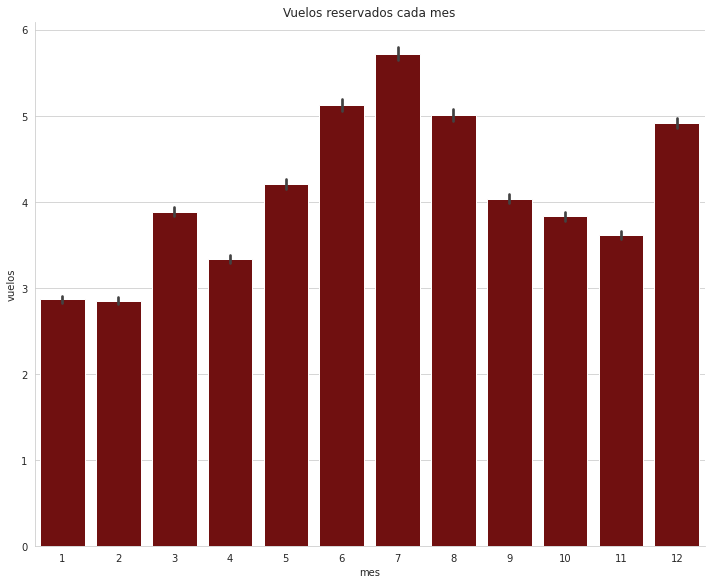

In [65]:
sns.set_style("whitegrid")

vuelos = df.groupby('month')['flights_booked'].count()
vuelos

plt.figure(figsize=(10, 8))
sns.barplot(y='flights_booked',
            x='month',
            data=df,
            color= "maroon")

plt.tight_layout()

plt.gca().spines['right'].set_visible(False)
plt.gca().spines["top"].set_visible(False)

plt.xlabel("mes")
plt.ylabel("vuelos")
plt.title('Vuelos reservados cada mes')

plt.show()

2- ¿Existe una relación entre la distancia de los vuelos y los puntos acumulados por los clientes?

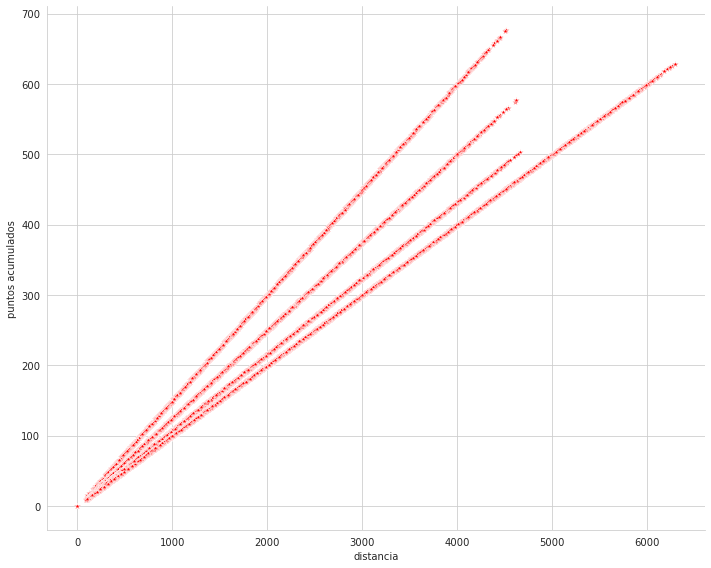

In [66]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='distance', 
                    y='points_accumulated',
                    data=df,
                    marker='*',
                    color='r')

plt.tight_layout()


plt.gca().spines['right'].set_visible(False)
plt.gca().spines["top"].set_visible(False)

plt.xlabel("distancia")
plt.ylabel("puntos acumulados")

plt.show()


3- ¿Cuál es la distribución de los clientes por provincia o estado?

In [67]:
provincias = df.groupby('province')['loyalty_number'].count().reset_index()
provincias

,province,loyalty_number
0,Alberta,23400
1,British Columbia,106848
2,Manitoba,15984
3,New Brunswick,15432
4,Newfoundland,6312
5,Nova Scotia,12576
6,Ontario,130896
7,Prince Edward Island,1584
8,Quebec,79968
9,Saskatchewan,9936


<Figure size 432x288 with 0 Axes>

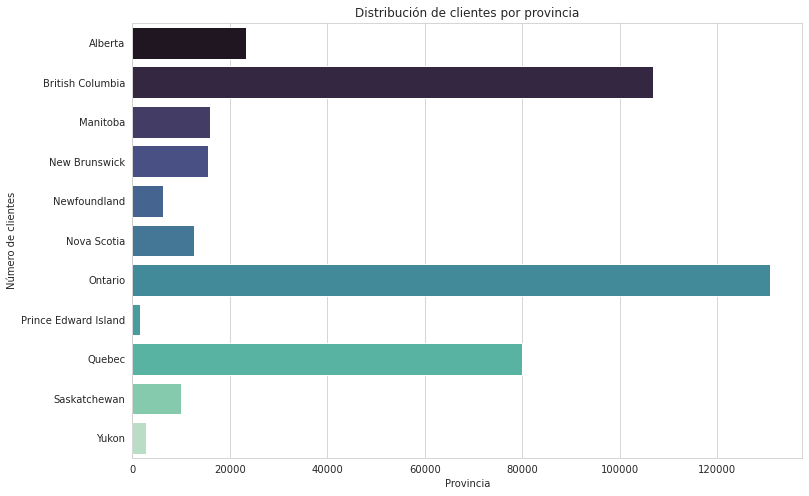

In [68]:
plt.tight_layout()

plt.figure(figsize=(12, 8))

sns.barplot(data = provincias, 
            x='loyalty_number',
            y='province',
            palette = 'mako')

plt.title('Distribución de clientes por provincia')
plt.xlabel('Provincia')
plt.ylabel('Número de clientes')

plt.show()

4- ¿Cómo se compara el salario promedio entre los diferentes niveles educativos de los clientes?

In [69]:
orden = ['High School or Below', 'College', 'Bachelor', 'Master', 'Doctor']

promedio = df.groupby('education')['salary'].mean().reindex(orden).reset_index()

<Figure size 432x288 with 0 Axes>

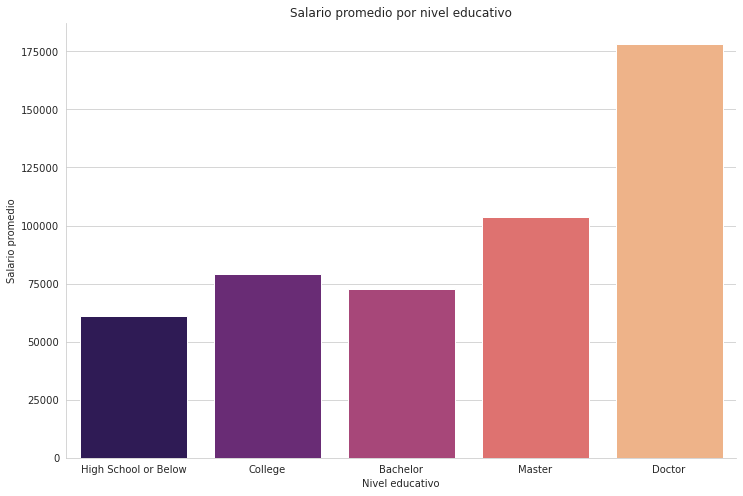

In [70]:
plt.tight_layout()

plt.figure(figsize=(12, 8))

sns.barplot(x='education',
            y='salary',
            data=promedio,
            order=orden,
            palette='magma')
plt.title('Salario promedio por nivel educativo')


plt.gca().spines['right'].set_visible(False)
plt.gca().spines["top"].set_visible(False)

plt.xlabel('Nivel educativo')
plt.ylabel('Salario promedio')

plt.show()

5- ¿Cuál es la proporción de clientes con diferentes tipos de tarjetas de fidelidad?


In [71]:
clientas = df.groupby('loyalty_card')['loyalty_number'].count().reset_index()
clientas

,loyalty_card,loyalty_number
0,Aurora,83832
1,Nova,137568
2,Star,184224


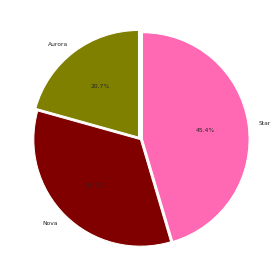

In [72]:
plt.pie(clientas['loyalty_number'],  
        labels=clientas['loyalty_card'],
        autopct='%1.1f%%',
        colors=["olive", "maroon","hotpink"],
        textprops={'fontsize': 6},
        startangle=90,
        explode=(0.03,0,0.02))

plt.tight_layout()

plt.show()

6- ¿Cómo se distribuyen los clientes según su estado civil y género?

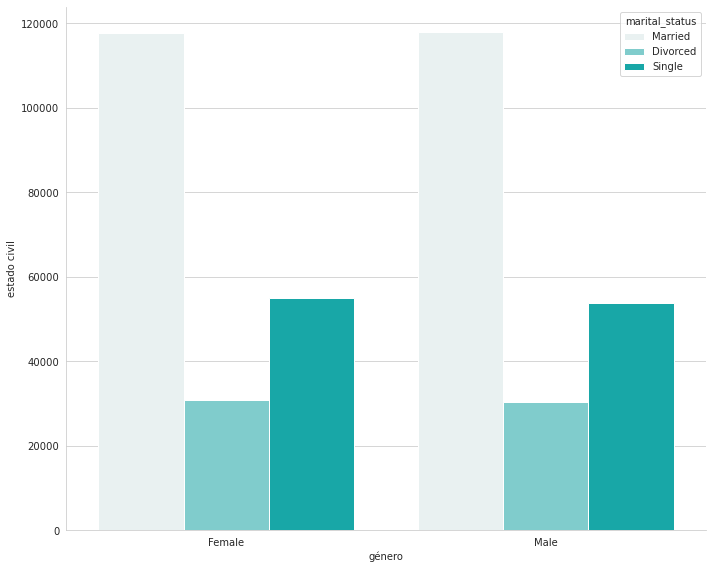

In [73]:
plt.figure(figsize=(10, 8))
sns.countplot(x='gender',
                data = df, 
                color = "c",
                hue = "marital_status")

plt.tight_layout()

plt.gca().spines['right'].set_visible(False)
plt.gca().spines["top"].set_visible(False)

plt.xlabel("género")
plt.ylabel("estado civil")

plt.show()


## Fase 3: Evaluación de Diferencias en Reservas de Vuelos por Nivel Educativo

 Objetivo del Ejercicio: Utilizando un conjunto de datos que hemos compartido, se busca evaluar si existen diferencias significativas en el número de vuelos reservados según el nivel educativo de los clientes. Para ello, los pasos que deberas seguir son:

 1- Preparación de Datos:
 Filtra el conjunto de datos para incluir únicamente las columnas relevantes: 'Flights Booked' y 'Education'.

 2- Análisis Descriptivo:
 Agrupa los datos por nivel educativo y calcula estadísticas descriptivas básicas (como el promedio, la desviación estandar, los percentiles) del número de vuelos reservados para cada grupo.

 3- Prueba Estadística:
 Realiza una prueba de A/B testing para determinar si existe una diferencia significativa en el número de vuelos reservados entre los diferentes niveles educativos.

In [74]:
df3 = df[['loyalty_number','flights_booked', 'education']]
df3

,loyalty_number,flights_booked,education
0,480934,0,Bachelor
1,480934,3,Bachelor
2,480934,0,Bachelor
3,480934,0,Bachelor
4,480934,6,Bachelor
...,...,...,...
405619,652627,0,Bachelor
405620,652627,0,Bachelor
405621,652627,0,Bachelor
405622,652627,0,Bachelor


In [75]:
agrupacion = df3.groupby('education')['flights_booked'].count().reset_index()
agrupacion

,education,flights_booked
0,Bachelor,253752
1,College,102672
2,Doctor,17856
3,High School or Below,19008
4,Master,12336


In [76]:
def niveles(valor):
    if valor in ['High School or Below', 'College', 'Bachelor']:
        return 'básica'
    else:
        return 'superior'

df3['education'] = df3['education'].apply(niveles)
df3

,loyalty_number,flights_booked,education
0,480934,0,básica
1,480934,3,básica
2,480934,0,básica
3,480934,0,básica
4,480934,6,básica
...,...,...,...
405619,652627,0,básica
405620,652627,0,básica
405621,652627,0,básica
405622,652627,0,básica


In [79]:
estadisticas = df3.groupby('education')['flights_booked'].describe()
estadisticas

,count,mean,std,min,25%,50%,75%,max
education,,,,,,,,
básica,375432.0,4.111301,5.224839,0.0,0.0,1.0,8.0,21.0
superior,30192.0,4.161698,5.233815,0.0,0.0,1.0,8.0,21.0


In [80]:
df3['flights_booked'].describe()

count    405624.000000
mean          4.115052
std           5.225518
min           0.000000
25%           0.000000
50%           1.000000
75%           8.000000
max          21.000000
Name: flights_booked, dtype: float64